# Test KaiserSource

Brendan Smithyman | November 2015

This notebook tests the advanced KaiserSource

In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
from anemoi import MiniZephyr, SimpleSource, KaiserSource

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
matplotlib.rcParams['savefig.dpi'] = 150 # Change this to adjust figure size

In [4]:
systemConfig = {
    'dx':       1.,     # m
    'dz':       1.,     # m
    'c':        2500.,  # m/s
    'rho':      1.,     # kg/m^3
    'nx':       100,    # count
    'nz':       200,    # count
    'freq':     2e2,    # Hz
}

nx = systemConfig['nx']
nz = systemConfig['nz']
dx = systemConfig['dx']
dz = systemConfig['dz']

In [5]:
MZ = MiniZephyr(systemConfig)
SS = SimpleSource(systemConfig)
KS = KaiserSource(systemConfig)

xs, zs = 25, 25.5
sloc = np.array([xs, zs]).reshape((1,2))

qs = SS(sloc)
qk = KS(sloc)
uMZs = MZ*qs
uMZk = MZ*qk

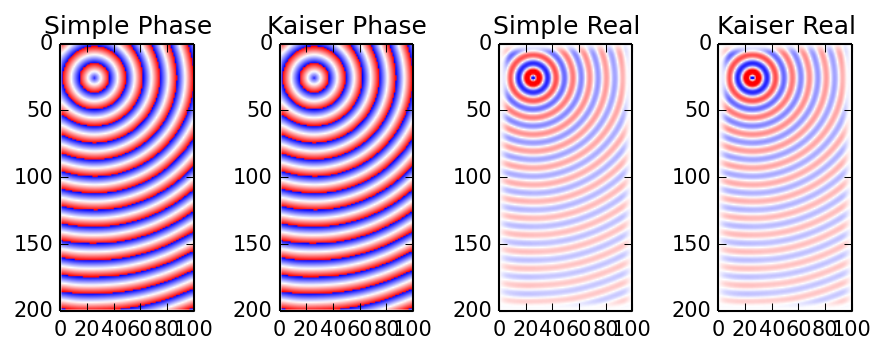

In [6]:
clip = 0.1

plotopts = {
    'vmin':     -np.pi,
    'vmax':     np.pi,
    'extent':   [0., dx * nx, dz * nz, 0.],
    'cmap':     cm.bwr,                
}

fig = plt.figure()

ax1 = fig.add_subplot(1,4,1)
plt.imshow(np.angle(uMZs.reshape((nz, nx))), **plotopts)
plt.title('Simple Phase')

ax2 = fig.add_subplot(1,4,2)
plt.imshow(np.angle(uMZk.reshape((nz, nx))), **plotopts)
plt.title('Kaiser Phase')

plotopts.update({
    'vmin':     -clip,
    'vmax':     clip,
})

ax3 = fig.add_subplot(1,4,3)
plt.imshow(uMZs.reshape((nz, nx)).real, **plotopts)
plt.title('Simple Real')

ax4 = fig.add_subplot(1,4,4)
plt.imshow(uMZk.reshape((nz, nx)).real, **plotopts)
plt.title('Kaiser Real')

fig.tight_layout()